<a href="https://colab.research.google.com/github/SupidchayaTangkidwanich/AIprototype65/blob/main/Tensorflow_(network).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sequential

### Import

In [27]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### Define

In [28]:
# Define Sequential model with 3 layers
# มีทั้งหมด 4 class
model = keras.Sequential(
    [
        keras.Input(shape=(4,)),
        layers.Dense(2, activation="relu", name="layer1"),
        layers.Dense(3, activation="relu", name="layer2"),
        layers.Dense(4, name="layer3"),
    ]
)

In [29]:
model.summary() # ช่วยทำให้รู้ว่าเเต่ Parameters(จำนวน weight) มี layers กี่ตัว # จะไม่ตรงเพราะว่า มันจะสร้าง node พิเศษมา 1 node เรียกว่า bias คือเป็นเลข 1 เสมอ เพื่อให้เกิดการเรียนรู้ได้ดีมากยิ่งขึ้น มี weight ของมันเอง

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 10        
                                                                 
 layer2 (Dense)              (None, 3)                 9         
                                                                 
 layer3 (Dense)              (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


## Predict 

การทำ forward class

In [30]:
# Call model on a test input
x = tf.ones((5, 4))

In [31]:
x # Input เป็นเลข 1 มี 5 แถว 4 หลัก

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]], dtype=float32)>

In [32]:
y = model(x)

In [33]:
y # สุ่ม weight 

<tf.Tensor: shape=(5, 4), dtype=float32, numpy=
array([[ 0.20464982,  0.09085113, -0.10253729,  0.16722609],
       [ 0.20464982,  0.09085113, -0.10253729,  0.16722609],
       [ 0.20464982,  0.09085113, -0.10253729,  0.16722609],
       [ 0.20464982,  0.09085113, -0.10253729,  0.16722609],
       [ 0.20464982,  0.09085113, -0.10253729,  0.16722609]],
      dtype=float32)>

## สร้าง sequential แบบที่สอง

In [34]:
model2 = keras.Sequential()
model2.add(keras.Input(shape=(4,)))
model2.add(layers.Dense(2, activation="relu"))
model2.add(layers.Dense(3, activation="relu"))
model2.add(layers.Dense(4))

In [35]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 3)                 9         
                                                                 
 dense_6 (Dense)             (None, 4)                 16        
                                                                 
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


## ปรับเปลี่ยน Network

In [36]:
model2.pop()

In [37]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 3)                 9         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [38]:
model2.add(layers.Dense(6))

In [39]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
 dense_5 (Dense)             (None, 3)                 9         
                                                                 
 dense_7 (Dense)             (None, 6)                 24        
                                                                 
Total params: 43
Trainable params: 43
Non-trainable params: 0
_________________________________________________________________


In [40]:
x = tf.ones((5, 4))
y = model2(x)
y

<tf.Tensor: shape=(5, 6), dtype=float32, numpy=
array([[0.77059203, 2.0007722 , 0.5452408 , 1.435934  , 0.8661462 ,
        2.1097338 ],
       [0.77059203, 2.0007722 , 0.5452408 , 1.435934  , 0.8661462 ,
        2.1097338 ],
       [0.77059203, 2.0007722 , 0.5452408 , 1.435934  , 0.8661462 ,
        2.1097338 ],
       [0.77059203, 2.0007722 , 0.5452408 , 1.435934  , 0.8661462 ,
        2.1097338 ],
       [0.77059203, 2.0007722 , 0.5452408 , 1.435934  , 0.8661462 ,
        2.1097338 ]], dtype=float32)>

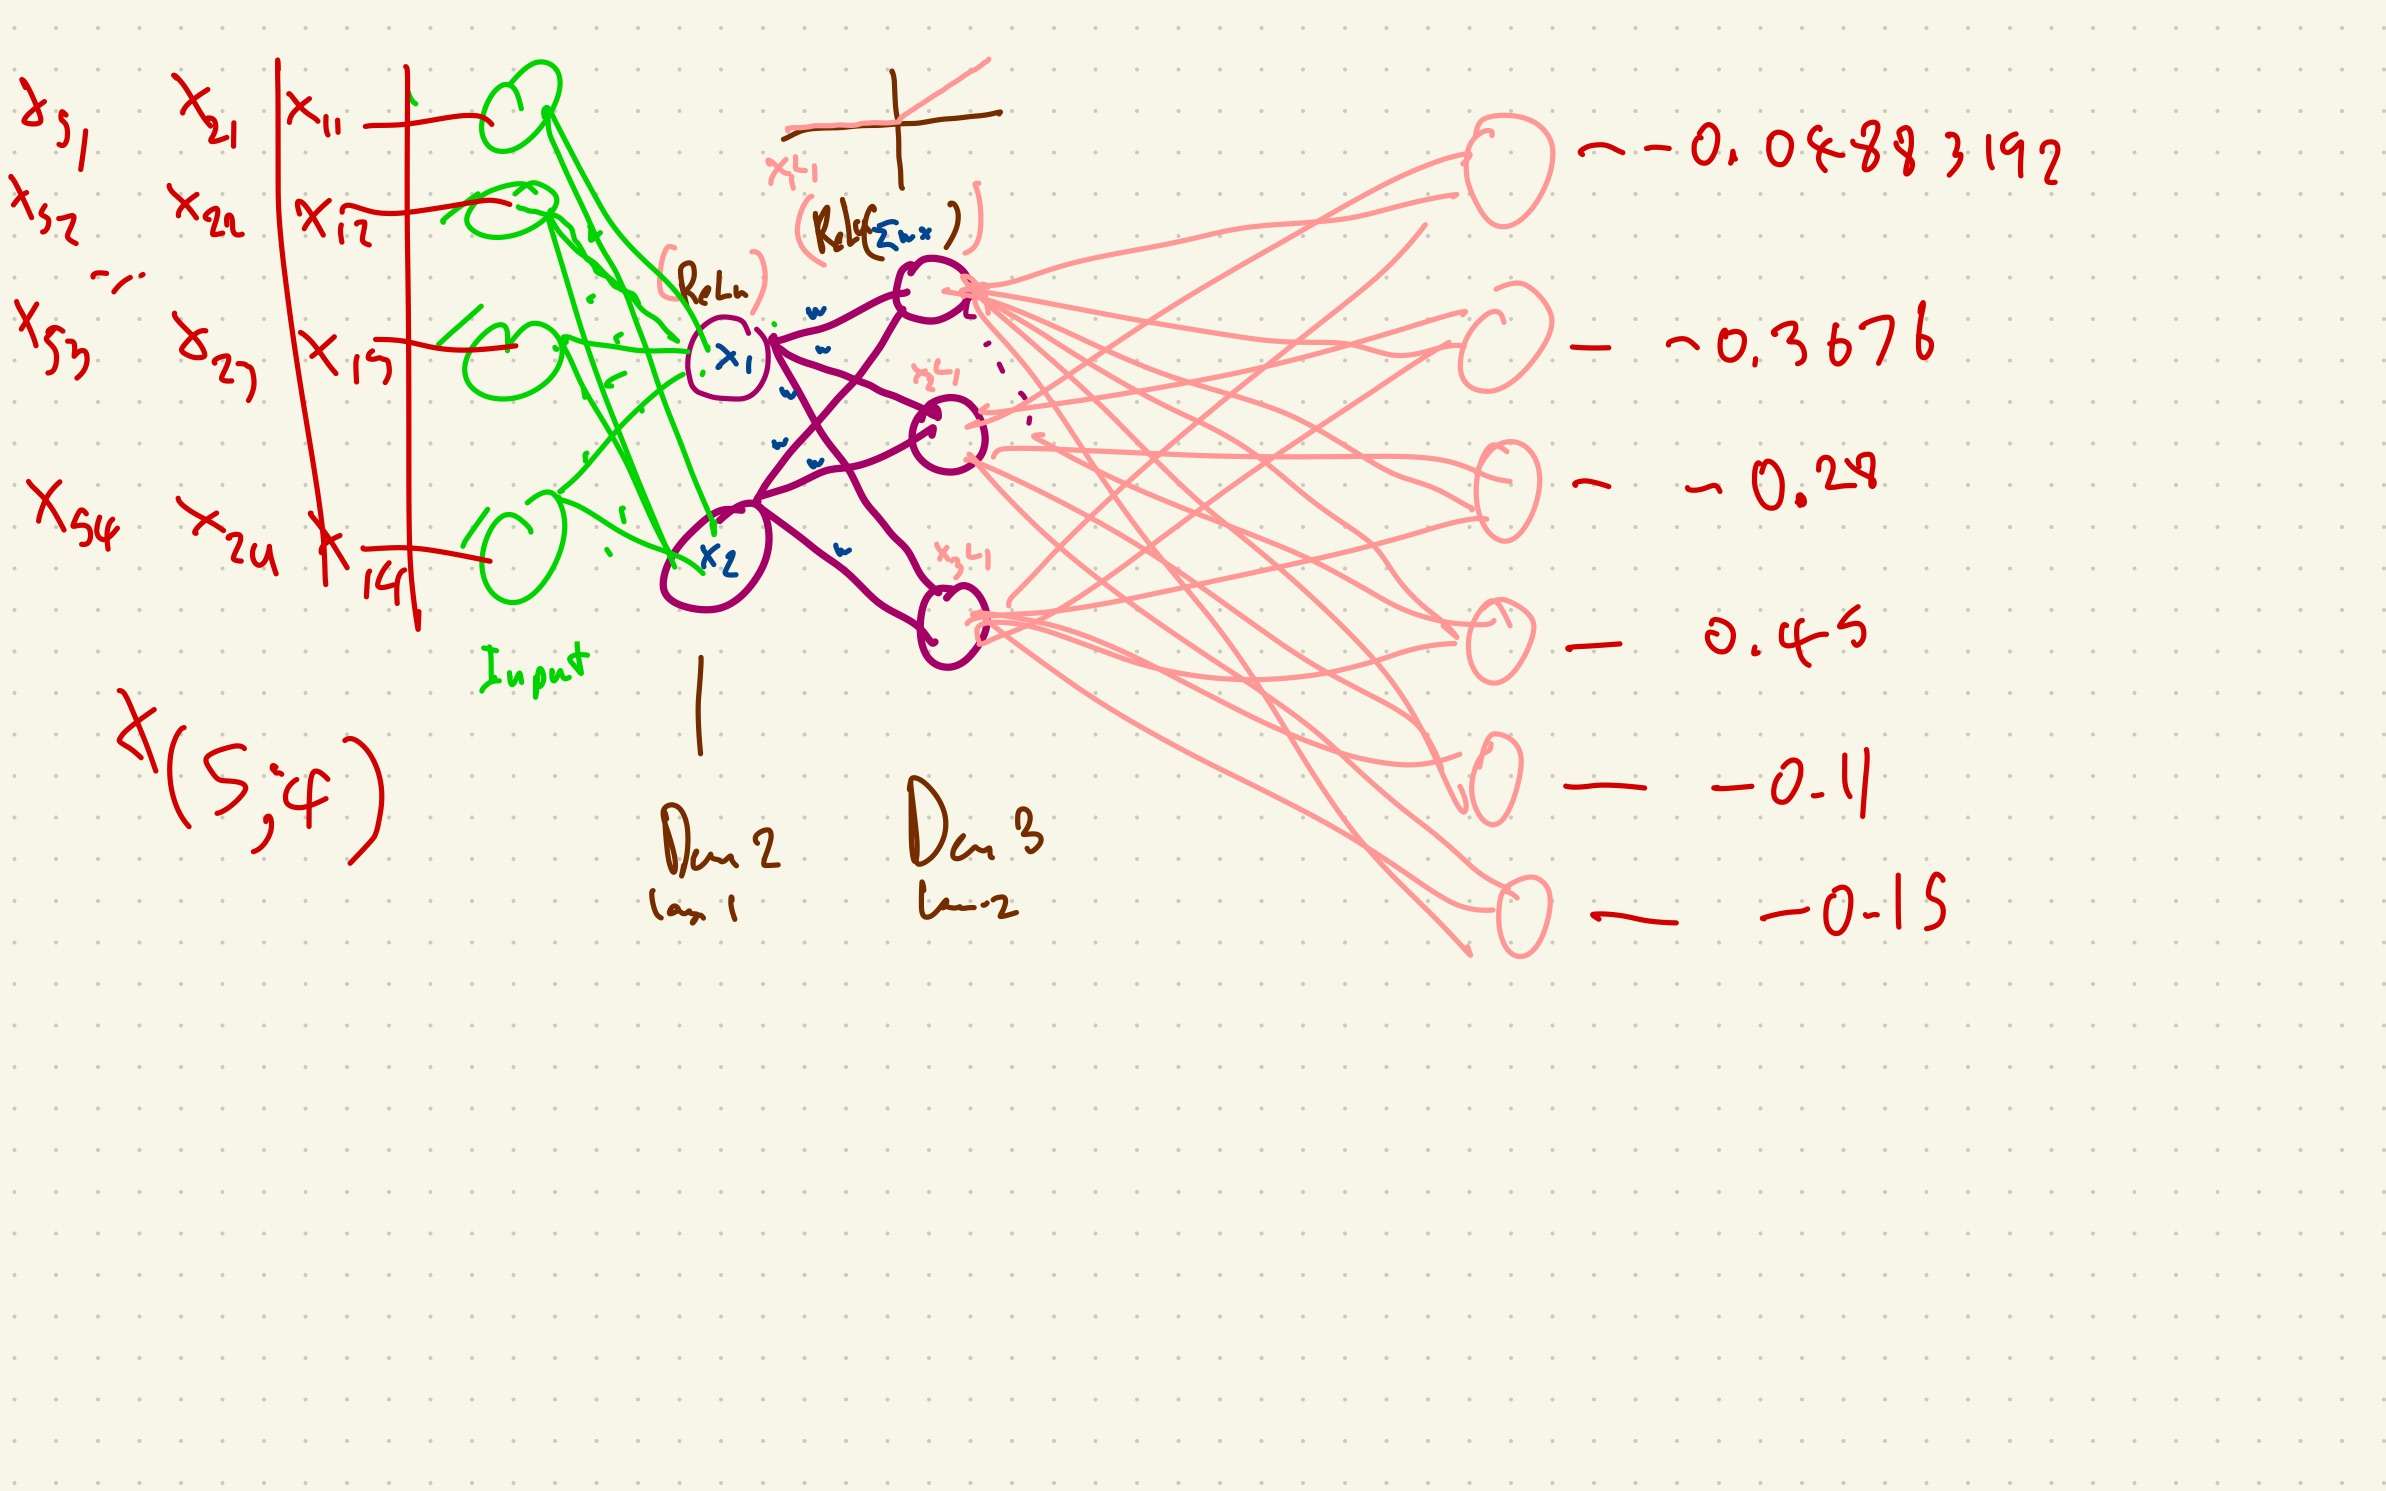

## ลองเทรน Sequential model ที่สร้างขึ้นเอง

In [41]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

### load data

In [42]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


## แปลงค่าเป็น 0-1 เพื่อนำเข้า network

In [43]:
# Normalize pixel values to be between 0 and 1 # หาร 255 เพื่อให้เป็น 0-1 ค่ามันจะดี มันจะปรับให้เรียนได้ง่ายขึ้น 
train_images, test_images = train_images / 255.0, test_images / 255.0

## plot รูปตัวอย่าง

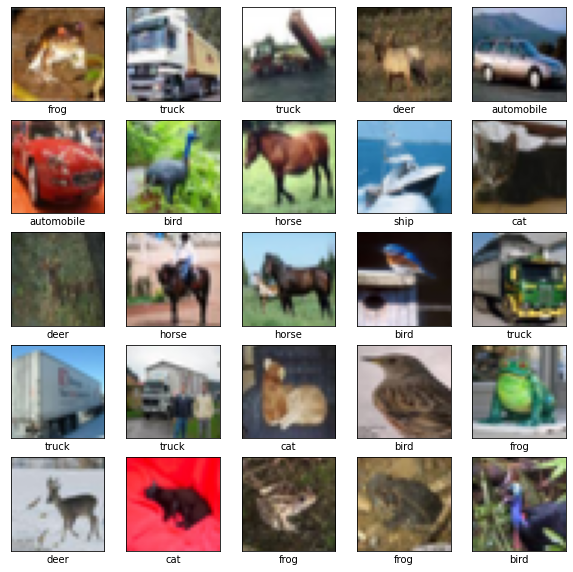

In [44]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

### Define

In [51]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # layers เเรกเป็น conv2D มี 32 fliter ขนาด fliter 3 x 3 ## รูปที่ใส่เข้ามาขนาด 32x32 มี 3 layers input สี RGB
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [52]:
model.summary() # มีทั้งหมด 5 layers 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56,320
Trainable params: 56,320
Non-trai

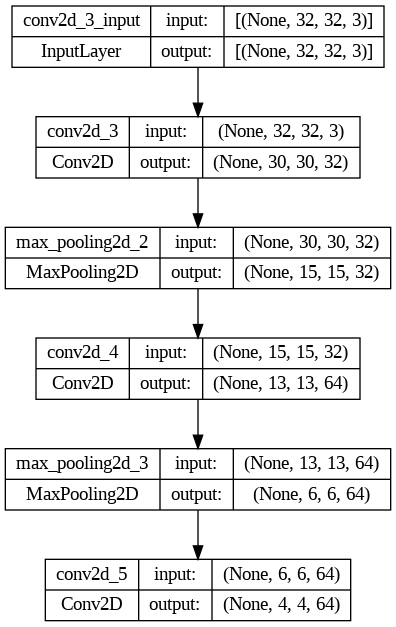

In [53]:
keras.utils.plot_model(model,show_shapes=True) # plot network 

## ต่อด้วย flatten และ dense เพื่อทำนาย

flatten คือการยืดรูป กลายเป็น เส้น 1 เส้น เป็น node

In [54]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10)) # 10 class

In [55]:
model.summary() # ควรมี flatten เพียงแค่รอบเดียว

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

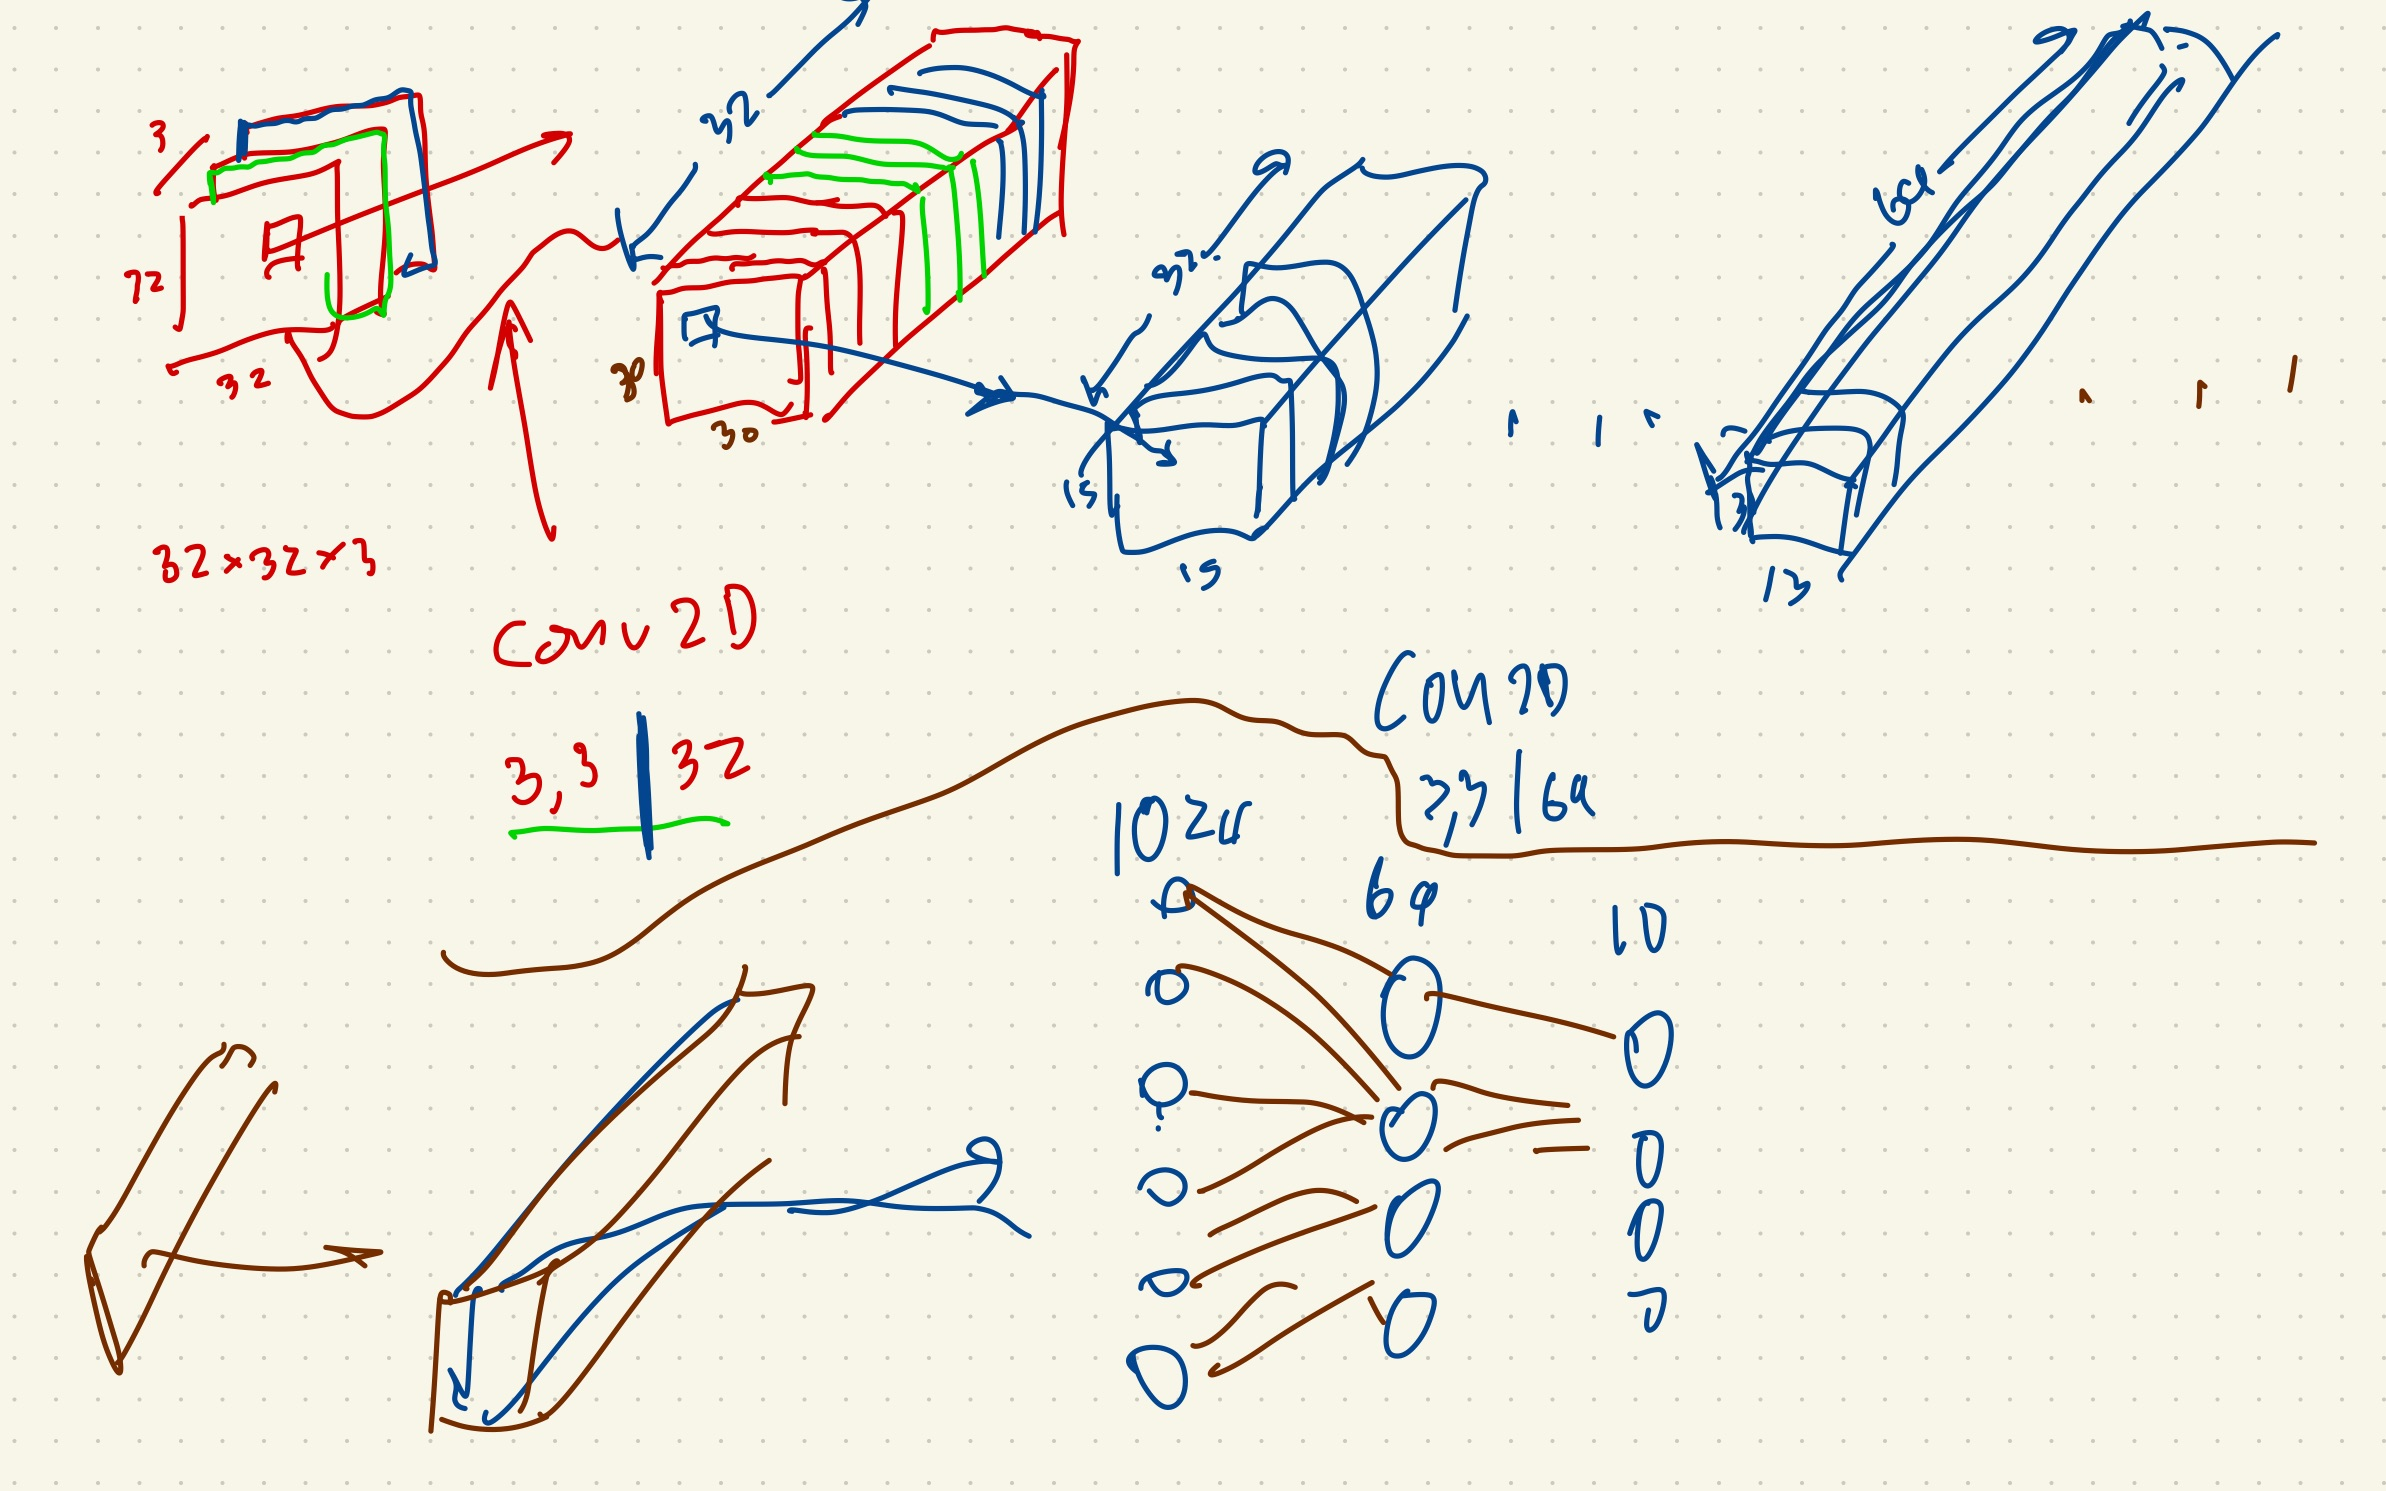

## Define training parameters


In [56]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # ระบุว่าจะใช้ loss อะไร
              metrics=['accuracy'])

## Train

In [57]:
history = model.fit(train_images, train_labels, epochs=2, # epochs คือ รอบ
                    validation_data=(test_images, test_labels)) # validation คือ มันแม่นยำอย่างไร  ## loss จะค่อย ๆ ลดลงเรื่อย ๆ ถ้ามันรู้เรื่อง

Epoch 1/2
1563/1563 [==============================] - 107s 68ms/step - loss: 1.5401 - accuracy: 0.4380 - val_loss: 1.2749 - val_accuracy: 0.5508
Epoch 2/2
1563/1563 [==============================] - 77s 50ms/step - loss: 1.1663 - accuracy: 0.5857 - val_loss: 1.0860 - val_accuracy: 0.6174


## Test

<ipython-input-58-a43554de54be>:6: MatplotlibDeprecationWarning: Unrecognized location 'top right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  plt.legend(loc='top right')


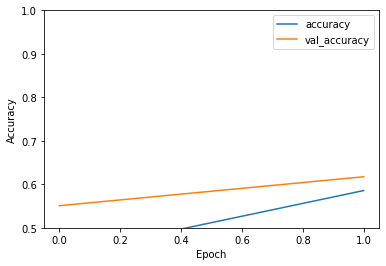

In [58]:
plt.plot(history.history['accuracy'], label='accuracy') # ดูว่ามีความแม่นยำเป็นเท่าไหร่บ้าง
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='top right')

In [59]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2) 

313/313 - 3s - loss: 1.0860 - accuracy: 0.6174 - 3s/epoch - 11ms/step


In [60]:
print(test_acc)

0.6173999905586243


# Functional

In [61]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [62]:
input_images = keras.Input(shape=(32, 32, 3), name="img")
model = layers.Conv2D(32, (3, 3), activation="relu", name="conv1")(input_images) # (input_images) input จาก layer ก่อนหน้า 
model = layers.MaxPooling2D((2, 2), name="maxpool1")(model) 
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv2")(model)
model = layers.MaxPooling2D((2, 2), name="maxpool2")(model)
model = layers.Conv2D(64, (3, 3), activation='relu', name="conv3")(model)
model = layers.Flatten(name="Flatten")(model)
model = layers.Dense(64, activation='relu', name="activation")(model)
output = layers.Dense(10, name="output")(model)
# นำเอา layers ก่อนหน้ามาเป็น input มาจากตัวไหนก็ได้ที่เราต้องการ

In [63]:
my_model = keras.Model(input_images, output, name = "mymodel") # ระบุว่า model มีอะไรบ้าง

In [64]:
my_model.summary()

Model: "mymodel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 img (InputLayer)            [(None, 32, 32, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 30, 30, 32)        896       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 15, 15, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 13, 13, 64)        18496     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 6, 6, 64)          0         
                                                                 
 conv3 (Conv2D)              (None, 4, 4, 64)          36928     
                                                                 
 Flatten (Flatten)           (None, 1024)              0   

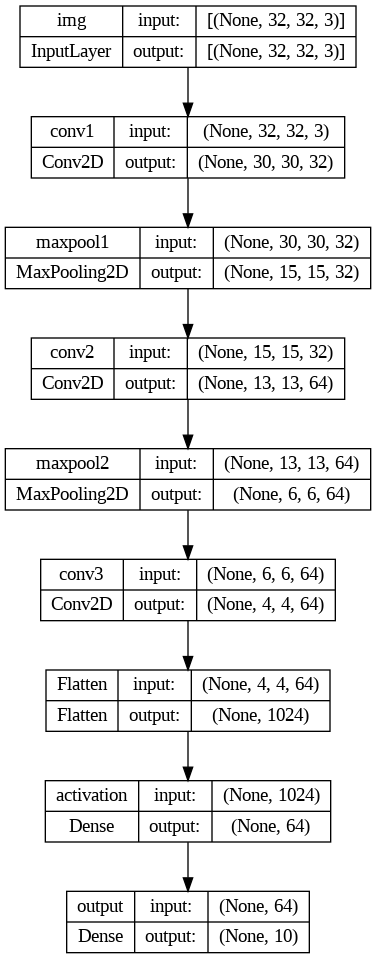

In [65]:
keras.utils.plot_model(my_model, show_shapes=True)

In [66]:
my_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [67]:
history = my_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.4809 - accuracy: 0.4631 - val_loss: 1.1824 - val_accuracy: 0.5819
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0939 - accuracy: 0.6163 - val_loss: 1.0342 - val_accuracy: 0.6340
Epoch 3/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9522 - accuracy: 0.6678 - val_loss: 1.0047 - val_accuracy: 0.6423
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8541 - accuracy: 0.7013 - val_loss: 0.8981 - val_accuracy: 0.6954
Epoch 5/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7791 - accuracy: 0.7282 - val_loss: 0.8832 - val_accuracy: 0.6958
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7209 - accuracy: 0.7487 - val_loss: 0.8842 - val_accuracy: 0.6973
Epoch 7/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6711 - accuracy: 0.7644 - val_loss: 0.8835 -

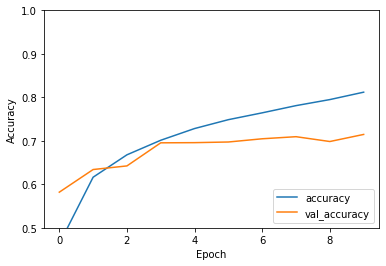

In [68]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [69]:
test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 5s - loss: 0.8741 - accuracy: 0.7147 - 5s/epoch - 18ms/step


In [70]:
print(test_acc)

0.7146999835968018


## ResNet

In [71]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

resnet_model = keras.Model(inputs, outputs, name="toy_resnet")
resnet_model.summary()

Model: "toy_resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_6 (Conv2D)              (None, 30, 30, 32)   896         ['img[0][0]']                    
                                                                                                  
 conv2d_7 (Conv2D)              (None, 28, 28, 64)   18496       ['conv2d_6[0][0]']               
                                                                                                  
 max_pooling2d_4 (MaxPooling2D)  (None, 9, 9, 64)    0           ['conv2d_7[0][0]']               
                                                                                         

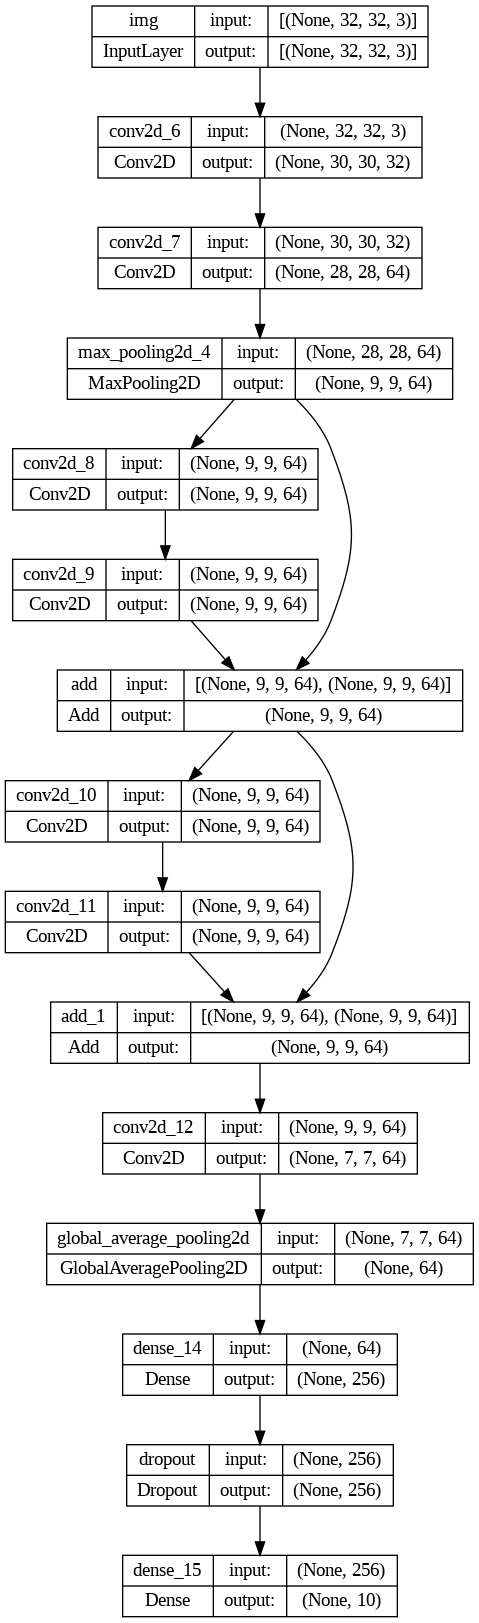

In [72]:
keras.utils.plot_model(resnet_model,  show_shapes=True)

In [73]:
resnet_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [82]:
history = resnet_model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1149/1563 [=====================>........] - ETA: 1:03 - loss: 0.9972 - accuracy: 0.6443

KeyboardInterrupt: ignored

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = my_model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
print(test_acc)

# Tensorflow Data Pipeline
flow from directory

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [76]:
path2data = '/content/drive/MyDrive/Classification Dataset'

In [77]:
inputs = keras.Input(shape=(200, 200, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(2)(x)

resnet_model_dm = keras.Model(inputs, outputs, name="resnet_dog_muff")
resnet_model_dm.summary()

Model: "resnet_dog_muff"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 img (InputLayer)               [(None, 200, 200, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_13 (Conv2D)             (None, 198, 198, 32  896         ['img[0][0]']                    
                                )                                                                 
                                                                                                  
 conv2d_14 (Conv2D)             (None, 196, 196, 64  18496       ['conv2d_13[0][0]']              
                                )                                                   

In [78]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# image propmentation ทำให้รูปมันหลากหลาย
train_datagen = ImageDataGenerator(
      rescale=1./255, # หาร 255 ให้มันเข้าใกล้ 0-1 
      rotation_range=40, # random rotation อนุญาตให้หมุนได้ 40 องศา
      width_shift_range=0.2, # ยืดรูป ด้านกว้าง
      height_shift_range=0.2, # ยืดรูป ด้านสูง
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True, # flip คือพลิกรูป
      fill_mode='nearest') # สีใกล้สุดไปใส่ให้มันตรงขอบ 

train_generator = train_datagen.flow_from_directory( # data ตั้งเป็น folder ใช้สำหรับ data เล็ก ๆ 
        # This is the target directory
        path2data,
        # All images will be resized to target height and width.
        target_size=(200, 200),
        batch_size=4,
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')

# # Note that the validation data should not be augmented!
# test_datagen = ImageDataGenerator(rescale=1./255)
# validation_generator = test_datagen.flow_from_directory(
#         validation_dir,
#         target_size=(height, width),
#         batch_size=batch_size,
#         class_mode='categorical')

Found 30 images belonging to 2 classes.


In [79]:
from tensorflow.keras import optimizers

In [80]:
resnet_model_dm.compile(optimizer=optimizers.Adam(lr=2e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [81]:
history = resnet_model_dm.fit_generator(
      train_generator,
      steps_per_epoch= 7,
      epochs=50,
      verbose=1)

<ipython-input-81-bd3860035948>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = resnet_model_dm.fit_generator(


Epoch 1/50
7/7 [==============================] - 12s 1s/step - loss: 3.0313 - accuracy: 0.6538
Epoch 2/50
7/7 [==============================] - 6s 910ms/step - loss: 3.6499 - accuracy: 0.5385
Epoch 3/50
7/7 [==============================] - 6s 890ms/step - loss: 0.8503 - accuracy: 0.4615
Epoch 4/50
7/7 [==============================] - 6s 889ms/step - loss: 0.7045 - accuracy: 0.5000
Epoch 5/50
7/7 [==============================] - 6s 907ms/step - loss: 0.6381 - accuracy: 0.5769
Epoch 6/50
7/7 [==============================] - 6s 884ms/step - loss: 0.7329 - accuracy: 0.3846
Epoch 7/50
7/7 [==============================] - 6s 907ms/step - loss: 0.7491 - accuracy: 0.4231
Epoch 8/50
7/7 [==============================] - 6s 988ms/step - loss: 0.6840 - accuracy: 0.6154
Epoch 9/50
7/7 [==============================] - 6s 905ms/step - loss: 0.7442 - accuracy: 0.3462
Epoch 10/50
7/7 [==============================] - 6s 973ms/step - loss: 0.6634 - accuracy: 0.6923
Epoch 11/50
7/7 [====